# Decision Tree Regressor Model

## Imports

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn import tree as tr

## Dataset

In [3]:
# Dados Treinamento
X_train = pd.read_csv("/home/ds_deivisson/repos/datasets/X_training_regressao.csv")
y_train = pd.read_csv("/home/ds_deivisson/repos/datasets/y_training_regressao.csv").squeeze()

# Dados Validacao
X_val = pd.read_csv("/home/ds_deivisson/repos/datasets/X_validation_regressao.csv")
y_val = pd.read_csv("/home/ds_deivisson/repos/datasets/y_validation_regressao.csv").squeeze()

# Dados Teste
X_test = pd.read_csv("/home/ds_deivisson/repos/datasets/X_test_regressao.csv")
y_test = pd.read_csv("/home/ds_deivisson/repos/datasets/y_test_regressao.csv").squeeze()

## Função de métricas

In [4]:
def regression_metrics(y_true, y_pred, prefix=""):
    return {
        f"R2{prefix}": mt.r2_score(y_true, y_pred),
        f"MSE{prefix}": mt.mean_squared_error(y_true, y_pred),
        f"RMSE{prefix}": np.sqrt(mt.mean_squared_error(y_true, y_pred)),
        f"MAE{prefix}": mt.mean_absolute_error(y_true, y_pred),
        f"MAPE{prefix}": mt.mean_absolute_percentage_error(y_true, y_pred),
    }

## Modelo com dados de treino

In [5]:
max_depth_values = np.arange(2, 50 , 1)
rmse_list = []

for i in max_depth_values:
    model = tr.DecisionTreeRegressor (max_depth=i, random_state=42)

    # Training
    model.fit(X_train, y_train)

    #Performance
    yhat_train = model.predict (X_train)

    rmse = np.sqrt(mt.mean_squared_error(y_train, yhat_train))
    rmse_list.append (rmse)

Text(0, 0.5, 'RMSE')

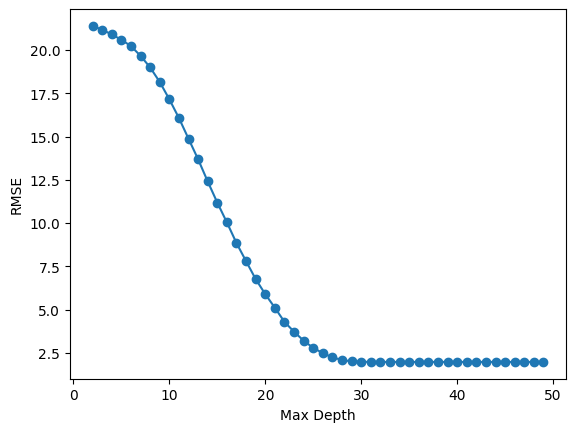

In [6]:
plt.plot(max_depth_values, rmse_list, marker = 'o')
plt.xlabel( 'Max Depth')
plt.ylabel( 'RMSE')

In [11]:
results = {}

model = tr.DecisionTreeRegressor (max_depth=30, random_state = 42)

# Training
model.fit(X_train, y_train)

#Performance
y_train_pred = model.predict(X_train)

metrics_train = regression_metrics(y_train, y_train_pred, "_train")

results = {**metrics_train}

for k, v in results.items():
    print(f"{k}: {v:.3f}")

R2_train: 0.992
MSE_train: 3.974
RMSE_train: 1.994
MAE_train: 0.227
MAPE_train: 0.083


## Modelo com dados de Validacao

In [23]:
max_depth_values = np.arange(2, 50 , 1)
rmse_list = []

for i in max_depth_values:
    model = tr.DecisionTreeRegressor (max_depth=i, random_state=42)

    # Training
    model.fit(X_train, y_train)

    #Performance
    yhat_val = model.predict (X_val)

    rmse = np.sqrt(mt.mean_squared_error(y_val, yhat_val))
    rmse_list.append (rmse)

Text(0, 0.5, 'RMSE')

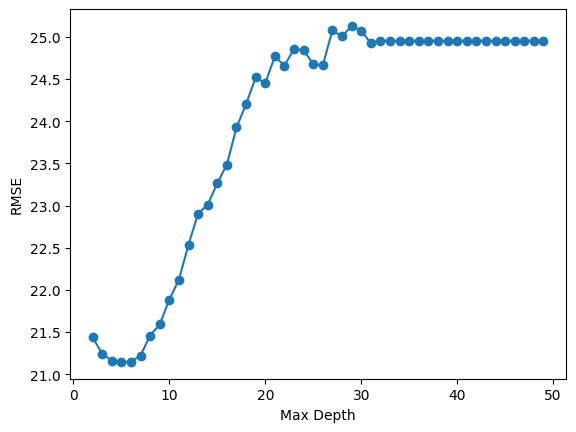

In [24]:
plt.plot(max_depth_values, rmse_list, marker = 'o')
plt.xlabel( 'Max Depth')
plt.ylabel( 'RMSE')

In [26]:
results = {}

model = tr.DecisionTreeRegressor (max_depth=5, random_state = 42)

# Training
model.fit(X_train, y_train)

#Performance
y_val_pred = model.predict(X_val)

metrics_val = regression_metrics(y_val, y_val_pred, "_val")

results = {**metrics_val}

for k, v in results.items():
    print(f"{k}: {v:.3f}")

R2_val: 0.064
MSE_val: 447.161
RMSE_val: 21.146
MAE_val: 16.843
MAPE_val: 8.396


## Modelo com dados de Teste

In [29]:
max_depth_values = np.arange(2, 50 , 1)
rmse_list = []

X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)

for i in max_depth_values:
    model = tr.DecisionTreeRegressor (max_depth=i, random_state=42)

    # Training
    model.fit(X_full, y_full)

    #Performance
    yhat_test = model.predict (X_test)

    rmse = np.sqrt(mt.mean_squared_error(y_test, yhat_test))
    rmse_list.append (rmse)

Text(0, 0.5, 'RMSE')

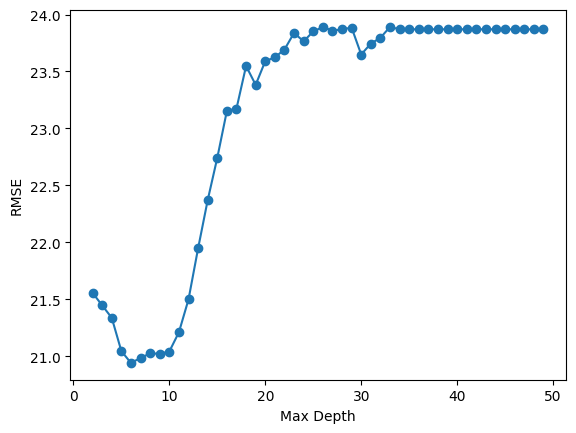

In [30]:
plt.plot(max_depth_values, rmse_list, marker = 'o')
plt.xlabel( 'Max Depth')
plt.ylabel( 'RMSE')

In [31]:
results = {}

model = tr.DecisionTreeRegressor (max_depth=5, random_state = 42)

# Training
model.fit(X_full, y_full)

#Performance
y_test_pred = model.predict(X_test)

metrics_test = regression_metrics(y_test, y_test_pred, "_test")

results = {**metrics_test}

for k, v in results.items():
    print(f"{k}: {v:.3f}")

R2_test: 0.090
MSE_test: 442.848
RMSE_test: 21.044
MAE_test: 16.830
MAPE_test: 7.883
